In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
SEED = 452

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import lightgbm as lgb


In [3]:
Dataframe=pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\loan.csv")



In [4]:
Dataframe

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,265,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,266,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629163,Good
2,5636,3392,3,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,267,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,268,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,269,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,34.663572,378,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,40.565631,379,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,380,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,381,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [5]:
Data_set=Dataframe[['Name','Age','Occupation','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Total_EMI_per_month','Credit_Score']].drop_duplicates()

In [6]:
Data_set


,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Total_EMI_per_month,Credit_Score
0,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,49.574949,Good
7,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,49.574949,Standard
8,Rick Rothackerj,28,Teacher,34847.84,3037.986667,2,18.816215,Standard
9,Rick Rothackerj,28,Teacher,34847.84,3037.986667,2,18.816215,Good
16,Langep,34,Engineer,143162.64,12187.220000,1,246.992320,Good
...,...,...,...,...,...,...,...,...
99987,Sarah McBridec,28,Architect,20002.88,1929.906667,10,60.964772,Standard
99991,Sarah McBridec,29,Architect,20002.88,1929.906667,10,60.964772,Standard
99992,Nicks,24,Mechanic,39628.99,3359.415833,4,35.104023,Poor
99993,Nicks,25,Mechanic,39628.99,3359.415833,4,35.104023,Standard


In [7]:
Df=Data_set['Occupation'].unique()

Text(0.5, 1.0, 'Distribution of Credit_Score')

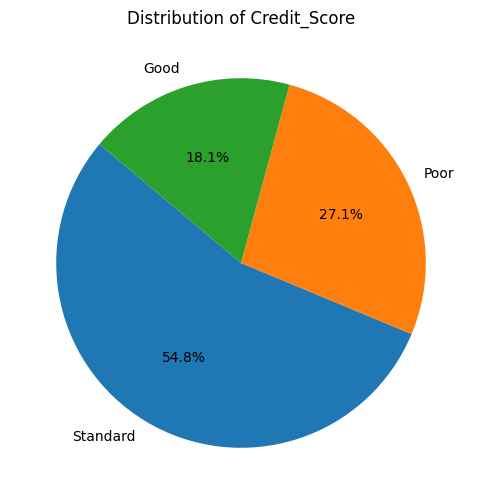

In [8]:
occupation_counts = Data_set['Credit_Score'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Credit_Score')

In [9]:
categorical_cols = Data_set.dtypes == 'object'
categorical_cols = list(categorical_cols[categorical_cols].index)


numeric_cols = Data_set.dtypes != 'object'
numeric_cols = list(numeric_cols[numeric_cols].index) 

In [10]:
categorical_cols

['Name', 'Occupation', 'Credit_Score']

In [11]:
numeric_cols

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Total_EMI_per_month']

In [12]:
Data_set.dtypes

Name                      object
Age                        int64
Occupation                object
Annual_Income            float64
Monthly_Inhand_Salary    float64
Num_Bank_Accounts          int64
Total_EMI_per_month      float64
Credit_Score              object
dtype: object

In [12]:
Data_set=pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\Banking proj\Data_set.csv")
Data=Data_set
if len(Data) > 1000:
    # Randomly sample rows to keep only 500 rows
    df_reduced = Data.sample(n=500, random_state=1)
    
df=df_reduced

In [14]:
df_complete = pd.concat([df],axis = 0)

# Save the id column of the test data frame
y =  df_complete['Repayment']

In [15]:
df_complete.dtypes

Customer_id      object
Age               int64
Income            int64
LoanAmount        int64
CreditScore       int64
InterestRate    float64
LoanTerm          int64
Repayment         int64
dtype: object

In [15]:
df_complete['Monthly_Inhand_Salary'] = Data_set['Monthly_Inhand_Salary'].astype(float)
df_complete['Monthly_Inhand_Salary'].dtypes

dtype('float64')

In [5]:
Data_set=pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\Banking proj\Data_set.csv")
Data=Data_set
if len(Data) > 1000:
    # Randomly sample rows to keep only 500 rows
    df_reduced = Data.sample(n=500, random_state=1)
    
df=df_reduced

In [10]:

df_dummies = pd.get_dummies(df)
df_dummies.head(3)

,Age,Income,LoanAmount,CreditScore,InterestRate,LoanTerm,Repayment,Customer_id_08EDQO3IWT,Customer_id_0CEI8KTXLI,Customer_id_0DAR6AT58L,...,Customer_id_ZDHR9X5SW6,Customer_id_ZHAXBJLC7A,Customer_id_ZHXM5101DJ,Customer_id_ZM5GYLHWE2,Customer_id_ZP4UOF2M96,Customer_id_ZPZ1WPTMFT,Customer_id_ZQXN5KWWFM,Customer_id_ZTACXD7J3M,Customer_id_ZYBWZLD3WJ,Customer_id_ZZQTTR7ZW5
96230,27,52584,60095,767,2.10,60,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73292,35,52120,110208,719,17.15,12,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45552,55,97782,85908,629,18.67,12,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
x_train, x_test, y_train, y_test = train_test_split(df_dummies, y, test_size=0.3, random_state=SEED)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((350, 507), (150, 507), (350,), (150,))

In [17]:

# Dummy classifier

dummy = DummyClassifier(random_state=SEED)
dummy.fit(x_train,y_train)
y_pred = dummy.predict(x_test)
acc_dummy = round(accuracy_score(y_test,y_pred)*100,2)

In [18]:
# Logistic regression

logreg = LogisticRegression(random_state=SEED)
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
acc_log = round(accuracy_score(y_test,y_pred)*100,2)

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:

# Support vector classifier

svc = SVC(random_state=SEED)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc  = round(accuracy_score(y_test,y_pred)*100,2)

In [20]:
# K-neighbors classifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(accuracy_score(y_test,y_pred)*100,2)

In [21]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
acc_gaussian = round(accuracy_score(y_test,y_pred)*100,2)

In [22]:
# Decision Tree classifier

decision_tree = DecisionTreeClassifier(random_state=SEED)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(accuracy_score(y_test,y_pred)*100,2)

In [23]:

# Random Forest classifier

random_forest = RandomForestClassifier(random_state = SEED)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
acc_random_forest = round(accuracy_score(y_test,y_pred)*100,2)

In [24]:
# Gradient boosting classifier

gbc = GradientBoostingClassifier(random_state=SEED)
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_test)
acc_gbc = round(accuracy_score(y_test,y_pred)*100,2)

In [25]:
xgbc = XGBClassifier(random_state=SEED)
xgbc.fit(x_train, y_train)
y_pred = xgbc.predict(x_test)
acc_xgbc = round(accuracy_score(y_test,y_pred)*100,2)

In [27]:
models = pd.DataFrame({
    'Model': ['Dummy classifier','Support vector classifier', 'K-neighbors classifier', 'Logistic regressor', 
              'Random forest classifier', 'Gaussian Naive-Bayes',  
              'Decision tree classifier', 'Gradient boosting classifier', 'XGBClassifier'],
              
    'RMSE': [acc_dummy, acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_decision_tree, acc_gbc, acc_xgbc]})
models.sort_values(by='RMSE', ascending=False)

,Model,RMSE
4,Random forest classifier,100.00
6,Decision tree classifier,100.00
7,Gradient boosting classifier,100.00
8,XGBClassifier,100.00
0,Dummy classifier,88.67
1,Support vector classifier,88.67
5,Gaussian Naive-Bayes,88.67
3,Logistic regressor,88.00
2,K-neighbors classifier,86.67


In [28]:
def rmse_cv(model):
    cv = KFold(n_splits=5, shuffle=True, random_state=SEED)
    rmse = (cross_val_score(model, x_test,
                                   y_test, scoring='f1', cv = cv))
    return(rmse)

In [29]:
# Dummy classifier
dummy_score = rmse_cv(dummy)

In [30]:
# Support vector classifier
svc_score = rmse_cv(svc)

In [31]:
# Logistic regressor
logreg_score = rmse_cv(logreg)

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [32]:
# K-neighbors classifier
knn_score = rmse_cv(knn)

In [33]:
# Gaussian Naive-Bayes
gaussian_score = rmse_cv(gaussian)

In [34]:
# Decision tree classifier
decision_tree_score = rmse_cv(decision_tree)

In [35]:

# Random forest classifier
random_forest_score = rmse_cv(random_forest)

In [36]:
# Gradient boosting classifier
gbc_score = rmse_cv(gbc)

In [37]:

# X boosting gradient classifier
xgbc_score = rmse_cv(xgbc)

In [38]:
models = pd.DataFrame({
    'Model': ['Dummy classifier', 'Support vector classifier', 'K-neighbors classifier', 'Logistic regressor', 
              'Random forest classifier', 'Gaussian Naive-Bayes',  
              'Decision tree classifier', 'Gradient boosting classifier', 'XGBClassifier'],

    'Accuracy': [dummy_score.mean(), svc_score.mean(), knn_score.mean(), logreg_score.mean(), 
              random_forest_score.mean(), gaussian_score.mean(), 
              decision_tree_score.mean(), gbc_score.mean(), xgbc_score.mean()],
    
    'Standard_deviation': [dummy_score.std(), svc_score.std(), knn_score.std(), logreg_score.std(), 
              random_forest_score.std(), gaussian_score.std(), 
              decision_tree_score.std(), gbc_score.std(), xgbc_score.std()]})

models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Standard_deviation
6,Decision tree classifier,1.00,0.000000
7,Gradient boosting classifier,1.00,0.000000
8,XGBClassifier,1.00,0.000000
4,Random forest classifier,0.56,0.387814
0,Dummy classifier,0.00,0.000000
1,Support vector classifier,0.00,0.000000
2,K-neighbors classifier,0.00,0.000000
3,Logistic regressor,0.00,0.000000
5,Gaussian Naive-Bayes,0.00,0.000000


In [39]:
# Mean square error with grid search parameters and cross-validation
def rmse_optimised_cv(model, parameters_space):
    cv = KFold(n_splits=5, shuffle=True, random_state=SEED)
    search = GridSearchCV(model, parameters_space, cv = cv)
    search.fit(x_test, y_test)
    rmse = (cross_val_score(search, x_test,
                                   y_test, scoring='f1', cv = cv))
    best_hiper_parameters = search.best_estimator_
    print("Best hiperparameters:\n", best_hiper_parameters)
    return(rmse)

In [40]:
# Dummy classifier

# Hiperparameters grid
parameters_space = {
    'strategy' : ['most_frequent', 'prior', 'stratified', 'uniform']}

dummy_score = rmse_optimised_cv(dummy, parameters_space)

Best hiperparameters:
 DummyClassifier(random_state=452, strategy='most_frequent')


In [42]:
# Dummy classifier

# Hiperparameters grid
parameters_space = {
    'strategy' : ['most_frequent', 'prior', 'stratified', 'uniform']}

dummy_score = rmse_optimised_cv(dummy, parameters_space)

Best hiperparameters:
 DummyClassifier(random_state=452, strategy='most_frequent')


In [43]:
# K-neighbors classifier

parameters_space = {
    'n_neighbors' : [13],
    'weights': ['uniform', 'distance'],
    'algorithm': ['kd_tree']}

knn_score = rmse_optimised_cv(knn, parameters_space)

Best hiperparameters:
 KNeighborsClassifier(algorithm='kd_tree', n_neighbors=13)


In [44]:
# Gradient boosting classifier

parameters_space = {
    'learning_rate' : [1],
    'n_estimators': [1],
    'subsample': [0.5, 1],
    'min_samples_leaf': [1, 5, 10]
    }

gbc_score = rmse_optimised_cv(gbc, parameters_space)

Best hiperparameters:
 GradientBoostingClassifier(learning_rate=1, n_estimators=1, random_state=452,
                           subsample=0.5)


In [45]:

# Support vector classifier

parameters_space = {
    'C' : [1.0],
    'gamma': ['scale', 'auto'],
    'decision_function_shape': ['ovo', 'ovr'],
    'random_state': [SEED]
    }


svc_score = rmse_optimised_cv(svc, parameters_space)

Best hiperparameters:
 SVC(decision_function_shape='ovo', random_state=452)


In [46]:
# Logistic regressor

parameters_space = {
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter' : [100, 200, 300]
    }

logreg_score = rmse_optimised_cv(logreg, parameters_space)

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [ ]:

# Gaussian Naive-Bayes

parameters_space = {
    "var_smoothing" : [5e-7, 1e-7, 5e-6]}

gaussian_score = rmse_optimised_cv(gaussian, parameters_space)

In [ ]:

# Decision tree classifier

parameters_space = {
    'max_depth' : [1,2,3],
    'min_samples_split' : [1,2,3],
    'min_samples_leaf' : [1,2,3,4],
    'criterion' : ['gini', 'entropy']}

decision_tree_score = rmse_optimised_cv(decision_tree, parameters_space)

In [ ]:
# Random forest classifier

parameters_space = {
    'n_estimators': [10],
    'max_depth' : [2],
    'min_samples_split' : [2],
    'min_samples_leaf' : [1,2,3],
    'criterion' : ['gini', 'entropy']}

random_forest_score = rmse_optimised_cv(random_forest, parameters_space)

In [ ]:

# X boosting gradient classifier

parameters_space = {
    'max_depth': [2],
    'learning_rate' : [1],
    'n_estimators' : [32]}

xgbc_score = rmse_optimised_cv(xgbc, parameters_space)

In [ ]:
models = pd.DataFrame({
    'Model': ['Dummy classifier', 'Support vector classifier', 'K-neighbors classifier', 'Logistic regressor', 
              'Random forest classifier', 'Gaussian Naive-Bayes',
              'Decision tree classifier', 'Gradient boosting classifier', 'XGBClassifier'],

    'Accuracy': [dummy_score.mean(), svc_score.mean(), knn_score.mean(), logreg_score.mean(), 
              random_forest_score.mean(), gaussian_score.mean(), 
              decision_tree_score.mean(), gbc_score.mean(), xgbc_score.mean()],
    
    'Standard_deviation': [dummy_score.std(), svc_score.std(), knn_score.std(), logreg_score.std(), 
              random_forest_score.std(), gaussian_score.std(),  
              decision_tree_score.std(), gbc_score.std(), xgbc_score.std()]})

models.sort_values(by='Accuracy', ascending=False)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Load the dataset
data = Data_set

# Feature selection
X = data[['Age', 'Income', 'LoanAmount', 'CreditScore', 'InterestRate', 'LoanTerm']]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means with chosen number of clusters (e.g., k=3)
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Add K-Means cluster labels to the original dataset
data['Cluster_KMeans'] = clusters_kmeans

# Evaluate K-Means Clustering
print("K-Means Clustering Evaluation Metrics:")
print(f"Silhouette Score: {silhouette_score(X_scaled, clusters_kmeans):.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_scaled, clusters_kmeans):.4f}")
print()

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)

# Add DBSCAN cluster labels to the original dataset
data['Cluster_DBSCAN'] = clusters_dbscan

# Evaluate DBSCAN Clustering
print("DBSCAN Clustering Evaluation Metrics:")
if len(set(clusters_dbscan)) > 1:  # Ensure there is more than one cluster
    print(f"Silhouette Score: {silhouette_score(X_scaled, clusters_dbscan, metric='euclidean'):.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_score(X_scaled, clusters_dbscan):.4f}")
else:
    print("DBSCAN resulted in only one cluster; metrics are not applicable.")

# Apply PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components and K-Means clusters to the original dataset
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]

# Plot the PCA result for K-Means clustering
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data['PCA1'], data['PCA2'], c=data['Cluster_KMeans'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Plot for K-Means Clustering')

# Plot the PCA result for DBSCAN clustering
plt.subplot(1, 2, 2)
plt.scatter(data['PCA1'], data['PCA2'], c=data['Cluster_DBSCAN'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Plot for DBSCAN Clustering')

plt.tight_layout()
plt.show()

# Display variance explained by PCA
print(f"Explained Variance Ratio by PCA: {pca.explained_variance_ratio_}")
print(f"Total Variance Explained by PCA: {pca.explained_variance_ratio_.sum():.4f}")
